In [1]:
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import pdb

In [2]:
dataset = fetch_california_housing()

In [3]:
pft = PolynomialFeatures(degree = 3)

In [4]:
label_prices = dataset['target']
feature_names = dataset['feature_names']

In [5]:
data_original = (dataset.data)
X_scaled = preprocessing.scale(dataset.data)

In [6]:
X_poly = pft.fit_transform(X_scaled)

In [7]:
X_train, X_dummy, y_train, y_dummy = train_test_split(X_poly, dataset.target, test_size = 0.40, random_state = 42)
X_CV,X_test,y_CV,y_test = train_test_split(X_dummy, y_dummy, test_size = 0.2, random_state = 42)

In [8]:
model = linear_model.Ridge(alpha = 9000)
model.fit(X_train, y_train)

Ridge(alpha=9000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
predictionCV = model.predict(X_CV)
predictionTestSet = model.predict(X_test)

In [10]:
errorCV = mean_squared_error(y_CV, predictionCV)
errorTestSet = mean_squared_error(y_test, predictionTestSet)


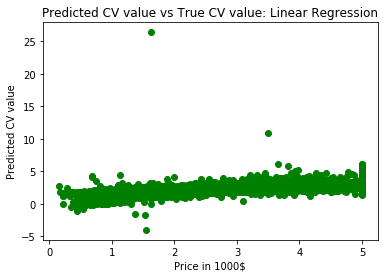

In [11]:
plt.scatter(y_CV, predictionCV, c = 'green')
plt.xlabel("Price in 1000$")
plt.ylabel("Predicted CV value")
plt.title("Predicted CV value vs True CV value: Linear Regression")
plt.show()


In [12]:
print("Predicted Value[60] from test set: {}\n".format(predictionTestSet[60]))
print("Original Value[60] form test set: {}\n".format(y_test[60]))
print("Prices for the houses: {}\n".format(label_prices))
print("Feature names: {}\n".format(feature_names))
print("Prediction in CV: {}\n".format(predictionCV))
print("Original Values of CV: {}\n".format(y_CV))

Predicted Value[60] from test set: 2.755454545084397

Original Value[60] form test set: 3.044

Prices for the houses: [4.526 3.585 3.521 ... 0.923 0.847 0.894]

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Prediction in CV: [1.92976486 1.81447965 1.7472605  ... 1.52765829 2.01224724 1.13936489]

Original Values of CV: [2.459 3.5   0.723 ... 1.157 3.746 0.762]



In [13]:
print("Error in cross-validation set: {:.2f}\n".format(errorCV))
print("Predicted value for test set: {}\n".format(predictionTestSet))
print("Original value for test set: {}\n".format(y_test))
print("Error in test set: {:.2f}\n".format(errorTestSet))

Error in cross-validation set: 0.73

Predicted value for test set: [1.52839572 1.35412555 2.46424637 ... 2.31755069 2.02579849 2.5529001 ]

Original value for test set: [0.413 0.69  1.675 ... 1.688 1.493 4.612]

Error in test set: 0.67

